In [1]:
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
data=pd.read_csv('GSE196134-Ready-45.csv')
data.set_index('Gene Symbol', inplace=True)

groups = ['Control', 'RSVB']
group_dfs = {}
for group in groups:
    matching_cols = [col for col in data.columns if col.startswith(group)]
    group_dfs[group] = data[matching_cols]
control_df = group_dfs['Control']
RSVB_df = group_dfs['RSVB']


R script output: [1] "Starting script execution."
[1] "Script has started running."
[1] "Guideline"
Script continues...
An object of class "DGEList"
$counts
       Control (1) Control (2) Control (3) Control (4) Control (5) Control (6)
HBG2        193528       72798      229806        7542       44389       61716
HBA1        404319      142096      262362       11578       63670       89377
HBG1         97208       41804      121647        3962       22337       30446
HBA2        324809      126057      194371        9809       52532       73548
EEF1A1      221050      169404      143483      191949      253812      194831
       Control (7) Control (8) Control (9) Control (10) Control (11)
HBG2          5407      110363      622841       205583         7546
HBA1          9213      119573      634553       156778         8348
HBG1          2768       58259      275389        96622         3951
HBA2          8006       96729      483565       128712         6690
EEF1A1      197092     

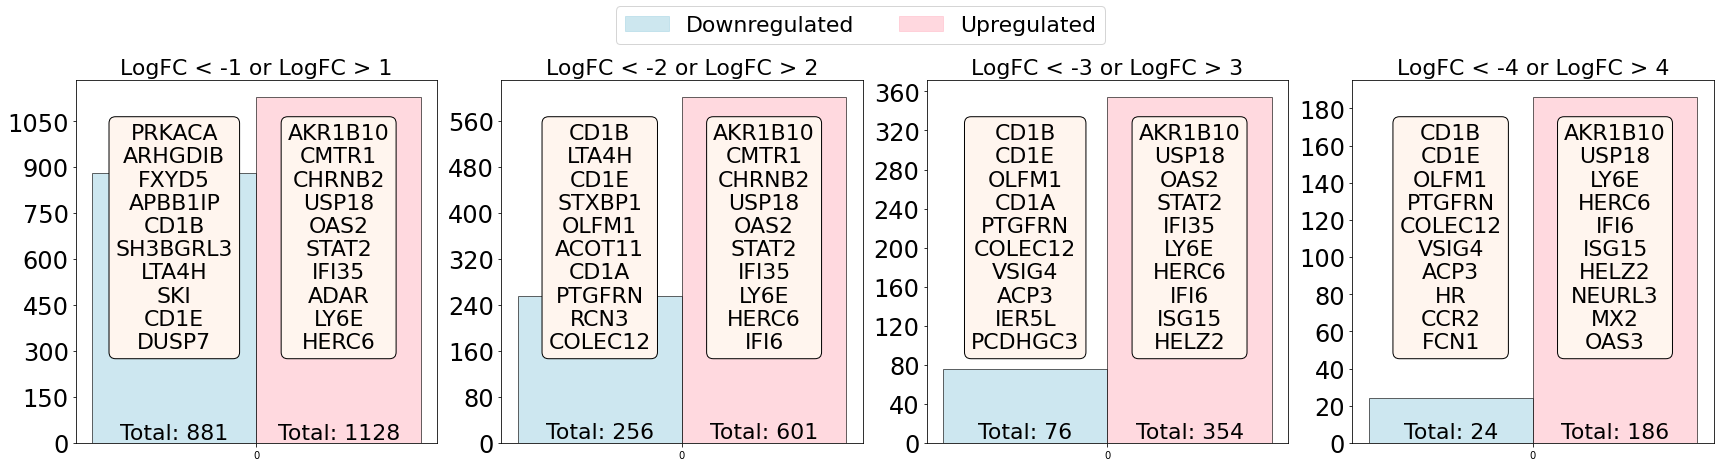

Loaded DataFrame: EdgeR_Significant_RSVB-10samples from .\EdgeR_Significant_RSVB-10samples.csv
Loaded DataFrame: EdgeR_Significant_RSVB-20samples from .\EdgeR_Significant_RSVB-20samples.csv
Loaded DataFrame: EdgeR_Significant_RSVB-45samples from .\EdgeR_Significant_RSVB-45samples.csv
Loaded DataFrame: EdgeR_Significant_RSVB-5samples from .\EdgeR_Significant_RSVB-5samples.csv
Processing file: EdgeR_Significant_RSVB-45samples.csv


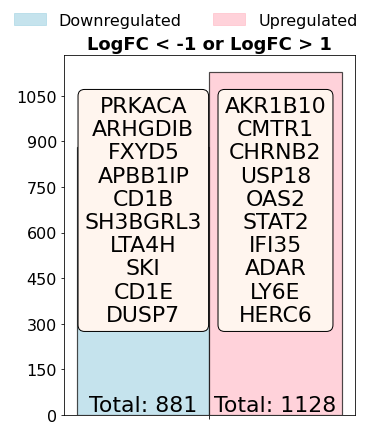

In [23]:
#repeat this for all condistions
import subprocess
def run_r_script():
    command = ['Rscript', 'TMM_GLMQL.R'] # use "edgeR_Deseq2.R" to generate all in one call
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
    if result.stdout:
        print('R script output:', result.stdout)
    if result.stderr:
        print('R script errors:', result.stderr)
if __name__ == "__main__":
    run_r_script()
import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """

    pattern = os.path.join(directory, "EdgeR_Control*_vs_*.csv")

    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}

    dataframes_dict = {}

    for file in csv_files:
        try:

            file_name = os.path.splitext(os.path.basename(file))[0]

   
            df = pd.read_csv(file)

         
            globals()[file_name] = df 

            # Add the DataFrame to the dictionary
            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":
    # Specify the directory where the files are located
    current_directory = "./"  # Replace with the actual directory path if needed

    # Read CSV files into DataFrames and store them in a dictionary
    dataframes = read_csv_files_to_dict(current_directory)

    # Example: Accessing a DataFrame
    print("\nAccessing DataFrames:")
    for file_name, df in dataframes.items():
        print(f"\nDataFrame: {file_name}")
        print(df.head())     
               
        
Data= dataframes['EdgeR_Control_vs_RSVB']

Data.rename(columns={'GeneSymbol': 'Gene Symbol'}, inplace=True)

title = "EdgeR_Control_vs_RSVB"
config_Upset = {
    'method': 'Bonferroni',
    'alpha': 0.05,
    'logFC_threshold': 1,
     'up_or_down_or_both':'both_up_and_down_regulated',
    'highlight_genes': [],
    'top_genes': 20,
    'upreg_criteria': None,
    'downreg_criteria': None,
    'upregulated_color': '#FF0000',
    'downregulated_color': '#0000FF',
    'not_significant_color': '#808080',
    'not_significant_between_logFC_threshold_color': '#A0A0A0',
    'pie_chart_size': 0.2,
    'pie_chart_position': (0.85, 0.85),
    'ranking_method': 'MAS',
    'Magnitude (M)':0,
    'Altitude (A)':1,    
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.6)
}



AllGenes_DE_HLTY_vs_SARS_CoV_2, Significant_DE_HLTY_vs_SARS_CoV_2 = volcano_plot_no_visualization(Data, M=config_Upset['Magnitude (M)'], A=config_Upset['Altitude (A)'],
                                     title=title, method=config_Upset['method'], alpha=config_Upset['alpha'],
                                     logFC_threshold=config_Upset['logFC_threshold'],
                                     highlight_genes=config_Upset['highlight_genes'], top_genes=config_Upset['top_genes'],
                                     upreg_criteria=config_Upset['upreg_criteria'],
                                     downreg_criteria=config_Upset['downreg_criteria'],
                                     upregulated_color=config_Upset['upregulated_color'],
                                     downregulated_color=config_Upset['downregulated_color'],
                                     not_significant_color=config_Upset['not_significant_color'],
                                     not_significant_between_logFC_threshold_color=config_Upset['not_significant_between_logFC_threshold_color'],
                                     pie_chart_size=config_Upset['pie_chart_size'],
                                     pie_chart_position=config_Upset['pie_chart_position'],
                                     ranking_method=config_Upset['ranking_method'],
                                     up_or_down_or_both=config_Upset['up_or_down_or_both'],
                                     g100=config_Upset['g100'], g010=config_Upset['g010'], g001=config_Upset['g001'],
                                     g110=config_Upset['g110'], g101=config_Upset['g101'], g011=config_Upset['g011'],
                                     g111=config_Upset['g111'])

config = {
    'method': 'Bonferroni',
    'alpha': 0.05,
    'logFC_threshold': 1,
     'up_or_down_or_both':'both_up_and_down_regulated',
    'highlight_genes': [],
    'top_genes': 20,
    'upreg_criteria': None,
    'downreg_criteria': None,
    'upregulated_color': '#FF0000',
    'downregulated_color': '#0000FF',
    'not_significant_color': '#808080',
    'not_significant_between_logFC_threshold_color': '#A0A0A0',
    'pie_chart_size': 0.2,
    'pie_chart_position': (0.85, 0.85),
    'ranking_method': 'MAS',
    'Magnitude (M)':0,
    'Altitude (A)':1,    
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.6)
}


logFC_threshold_values = range(1,5)  # 0 to 11

fig, axs = plt.subplots(1, 4, figsize=(24, 6))
axs = axs.flatten() 

title_font = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 24}
label_font = {'family': 'arial', 'color': 'navy', 'weight': 'bold', 'size': 24}
title_font2 = {'family': 'serif', 'color': 'black',  'size': 24}

for idx, logFC_threshold in enumerate(logFC_threshold_values):
    ax = axs[idx]
    # Update the logFC_threshold in your configuration
    config['logFC_threshold'] = logFC_threshold
    
    # Run the volcano_plot function with the updated config
    AllGenes, Significant = volcano_plot_no_visualization(Data, M=config['Magnitude (M)'], A=config['Altitude (A)'],
                                         title=title, method=config['method'], alpha=config['alpha'],
                                         logFC_threshold=config['logFC_threshold'],
                                         highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                         upreg_criteria=config['upreg_criteria'],
                                         downreg_criteria=config['downreg_criteria'],
                                         upregulated_color=config['upregulated_color'],
                                         downregulated_color=config['downregulated_color'],
                                         not_significant_color=config['not_significant_color'],
                                         not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                         pie_chart_size=config['pie_chart_size'],
                                         pie_chart_position=config['pie_chart_position'],
                                         ranking_method=config['ranking_method'],
                                         up_or_down_or_both=config['up_or_down_or_both'],
                                         g100=config['g100'], g010=config['g010'], g001=config['g001'],
                                         g110=config['g110'], g101=config['g101'], g011=config['g011'],
                                         g111=config['g111'])
    
    upregulated_counts = Significant[Significant['Category'] == 'Upregulated'].shape[0]
    downregulated_counts = Significant[Significant['Category'] == 'Downregulated'].shape[0]
    
    positions = np.arange(1)  
    width = 1
 
    ax.bar(positions - width/2, downregulated_counts, width, label='Downregulated', color='lightblue', edgecolor='black',alpha=.6)
    ax.bar(positions + width/2, upregulated_counts, width, label='Upregulated', color='pink', edgecolor='black',alpha=.6)

    if logFC_threshold == 0:
        title = f"LogFC < {logFC_threshold} or LogFC > {logFC_threshold}"
    else:
        title = f"LogFC < -{logFC_threshold} or LogFC > {logFC_threshold}"

    ax.set_title(title, fontsize=22)

    ax.set_xticks(positions)

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='y', labelsize=24) 
 

    top_10_down_genes = {
        'BH': Significant[Significant['logFC'] < 0].head(10)['Gene Symbol'].tolist(),
    }
    
    top_10_up_genes = {
        'BH': Significant[Significant['logFC'] > 0].head(10)['Gene Symbol'].tolist()

    }

    summary_stats = {
        'BH': {
            'Total': Significant.shape[0],
            'Upregulated': Significant[Significant['Category'] == 'Upregulated'].shape[0],
            'Downregulated': Significant[Significant['Category'] =='Downregulated'].shape[0]
        }
    }

    upregulated_counts = [summary_stats[obj]['Upregulated'] for obj in summary_stats]
    downregulated_counts = [summary_stats[obj]['Downregulated'] for obj in summary_stats]  # Keep as positive
    annotate_bars_vertical_with_totals(ax, positions, top_10_down_genes, top_10_up_genes, upregulated_counts, downregulated_counts, width)

upregulated_patch = mpatches.Patch(color='pink', label='Upregulated', edgecolor='black', alpha=0.6)
downregulated_patch = mpatches.Patch(color='lightblue', label='Downregulated', edgecolor='black', alpha=0.6)

fig.legend(handles=[downregulated_patch, upregulated_patch], loc='upper center', ncol=2, 
           bbox_to_anchor=(0.5, 1.1), fontsize=22)

plt.tight_layout(rect=[0, 0, 1, .98])  

plt.show()

Bonferroni_Upregulated=Significant_DE_HLTY_vs_SARS_CoV_2[Significant_DE_HLTY_vs_SARS_CoV_2['logFC']>1]
Bonferroni_Downregulated=Significant_DE_HLTY_vs_SARS_CoV_2[Significant_DE_HLTY_vs_SARS_CoV_2['logFC']<-1]
Bonferroni_Significant=Significant_DE_HLTY_vs_SARS_CoV_2.copy()

Bonferroni_Upregulated.to_csv('EdgeR_Upregulated_RSVB-45samples.csv', index=False)

Bonferroni_Downregulated.to_csv('EdgeR_Downregulated_RSVB-45samples.csv', index=False)

Bonferroni_Significant.to_csv('EdgeR_Significant_RSVB-45samples.csv', index=False)

import glob
import pandas as pd
import os

def read_csv_files_to_dict(directory):
    """
    Reads all CSV files matching the pattern 'DE_*_vs_*.csv' in the given directory,
    stores the data in DataFrames named after the CSV files (without extension),
    and creates a dictionary with file names as keys and DataFrames as values.

    Args:
        directory (str): Directory containing the CSV files.

    Returns:
        dict: A dictionary where keys are CSV file names (without extensions) and
              values are the corresponding pandas DataFrames.
    """
    pattern = os.path.join(directory, "EdgeR_Significant_*.csv")

    csv_files = glob.glob(pattern)

    if not csv_files:
        print("No matching files found in the directory.")
        return {}

    dataframes_dict = {}

    for file in csv_files:
        try:
            file_name = os.path.splitext(os.path.basename(file))[0]

            df = pd.read_csv(file)

            globals()[file_name] = df  # Create a global variable with the DataFrame

            dataframes_dict[file_name] = df

            print(f"Loaded DataFrame: {file_name} from {file}")

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    return dataframes_dict

if __name__ == "__main__":
    current_directory = "./"  

    ranked_dataframes = read_csv_files_to_dict(current_directory)



import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

def load_and_process_data():
    file_names = ['EdgeR_Significant_RSVB-45samples.csv']
    current_dir = os.getcwd()  

    for file_name in file_names:
        file_path = os.path.join(current_dir, file_name)

        if os.path.exists(file_path):
            print(f"Processing file: {file_name}")
            data = pd.read_csv(file_path)
            all_genes, significant_genes = analyze_gene_data(data)  

            new_base_name = file_name.replace('DE_', 'Ranked_DE_')

        else:
            print(f"File not found: {file_name}")

load_and_process_data()




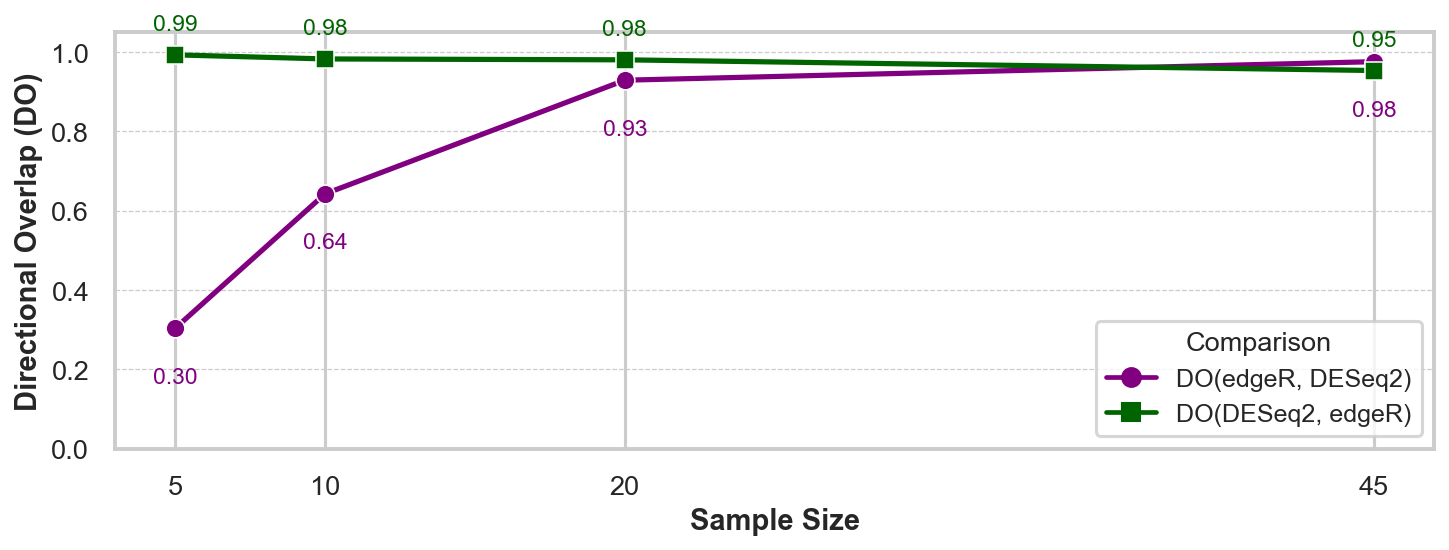

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


files = {
    "DESeq2": {
        5: "DESeq2_Significant_RSVB-5samples.csv",
        10: "DESeq2_Significant_RSVB-10samples.csv",
        20: "DESeq2_Significant_RSVB-20samples.csv",
        45: "DESeq2_Significant_RSVB-45samples.csv",
    },
    "edgeR": {
        5: "EdgeR_Significant_RSVB-5samples.csv",
        10: "EdgeR_Significant_RSVB-10samples.csv",
        20: "EdgeR_Significant_RSVB-20samples.csv",
        45: "EdgeR_Significant_RSVB-45samples.csv",
    }
}

def load_gene_sets(file_dict):
    gene_sets = {}
    for n, path in file_dict.items():
        df = pd.read_csv(path)
        gene_sets[n] = set(df.iloc[:, 0])
    return gene_sets

edger_genes = load_gene_sets(files["edgeR"])
deseq2_genes = load_gene_sets(files["DESeq2"])

def compute_directional_overlap(edger_sets, deseq2_sets):
    sample_sizes = sorted(set(edger_sets.keys()) & set(deseq2_sets.keys()))
    results = []
    for n in sample_sizes:
        A = edger_sets[n]
        B = deseq2_sets[n]
        inter = len(A & B)

        do_edger_deseq2 = inter / len(B) if len(B) > 0 else 0
        do_deseq2_edger = inter / len(A) if len(A) > 0 else 0

        results.append({"Sample": n, "Direction": "DO(edgeR, DESeq2)", "DO": do_edger_deseq2})
        results.append({"Sample": n, "Direction": "DO(DESeq2, edgeR)", "DO": do_deseq2_edger})
    return pd.DataFrame(results)

df_do = compute_directional_overlap(edger_genes, deseq2_genes)


palette = {
    "DO(edgeR, DESeq2)": "purple",
    "DO(DESeq2, edgeR)": "darkgreen"
}
markers = {
    "DO(edgeR, DESeq2)": "o",
    "DO(DESeq2, edgeR)": "s"
}


sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 4), dpi=150)

ax = sns.lineplot(
    data=df_do,
    x="Sample",
    y="DO",
    hue="Direction",
    style="Direction",
    markers=markers,
    dashes=False,
    palette=palette,
    linewidth=2.5,
    markersize=9
)


for direction in df_do["Direction"].unique():
    color = palette[direction]
    curve_data = df_do[df_do["Direction"] == direction]
    for _, row in curve_data.iterrows():
        offset = 10 if direction == "DO(DESeq2, edgeR)" else -18.5
        va = "bottom" if offset > 0 else "top"
        ax.annotate(f"{row['DO']:.2f}", (row["Sample"], row["DO"]),
                    textcoords="offset points", xytext=(0, offset),
                    ha='center', va=va, fontsize=11, color=color)


#plt.title("Directional Overlap Between edgeR and DESeq2", fontsize=20, weight='bold')
plt.xlabel("Sample Size", fontsize=14, weight='bold')
plt.ylabel("Directional Overlap (DO)", fontsize=14, weight='bold')
plt.xticks([5, 10, 20, 45], fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 1.05)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6)
plt.legend(title="Comparison", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()
